### Data load and first looks

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import project_utils

data_source = (r"winequality-red.csv")

data = pd.read_csv(data_source)

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.isnull().sum() # Check for null data, 

# If null, employ SimpleImputer
# This set is good to go

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


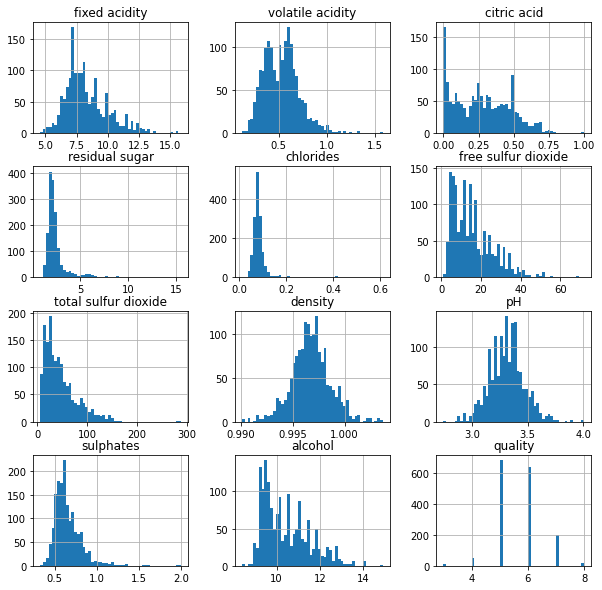

In [7]:
%matplotlib inline

data.hist(bins=50, figsize=(10,10))
plt.show()

# Get initial view of each column/feature

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


<AxesSubplot:>

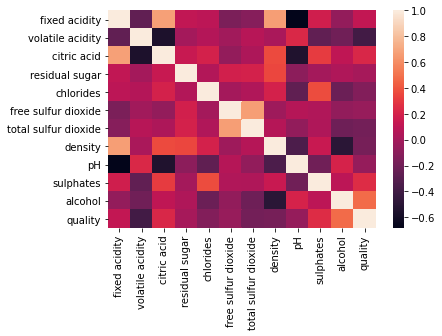

In [8]:
corr_matrix = data.corr()

print(corr_matrix['quality'].sort_values(ascending=False))

sns.heatmap(corr_matrix)

# Let's see if we have any obvious relationships from the whole set
# The strongest correlations are: alcohol, volatile acidity sulphates, and citric acid

In [9]:
data_bins = data.copy()

In [10]:
# Will create a few bins to give a cleaner view

bins = (2, 6, 8)
rating = ['bad', 'good']
data_bins['quality_bins'] = pd.cut(data_bins['quality'], bins = bins, labels = rating)


data_bins['volatile_bins'] = pd.cut(data_bins['volatile acidity'],
                              bins = [.25, .5, .75, 1, 1.25,  np.inf],
                              labels=[.25, .5, .75, 1, 1.25])

data_bins['sulphate_bins'] = pd.cut(data_bins['sulphates'],
                              bins=[.25, .5, .75, 1, 1.25, np.inf],
                              labels=[.25, .5, .75, 1, 1.25])

data_bins['alcohol_bins']=pd.cut(data_bins['alcohol'],
                           bins=[9, 9.5, 10, 10.5, 11, 11.5, 12, 12.5, 13, np.inf],
                           labels=[9, 9.5, 10, 10.5, 11, 11.5, 12, 12.5, 13])

data_bins['citric_bins'] = pd.cut(data_bins['citric acid'],
                            bins = [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1, np.inf],
                            labels=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1])

In [11]:
def data_plot(hue, data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        sns.set(rc={'figure.figsize':(20, 5)})
        ax = sns.countplot(x=data[col],palette='mako',hue=hue,data=data)

### Below shows occurence of the strongest relationships for our corr_matrix
* Quality by
    * volatile acidity bins
    * sulphate bins
    * alcohol bins
    * citric bins

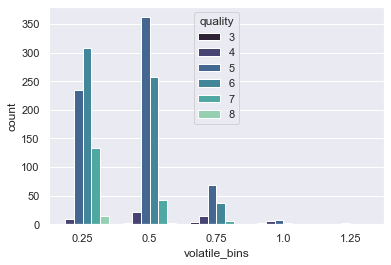

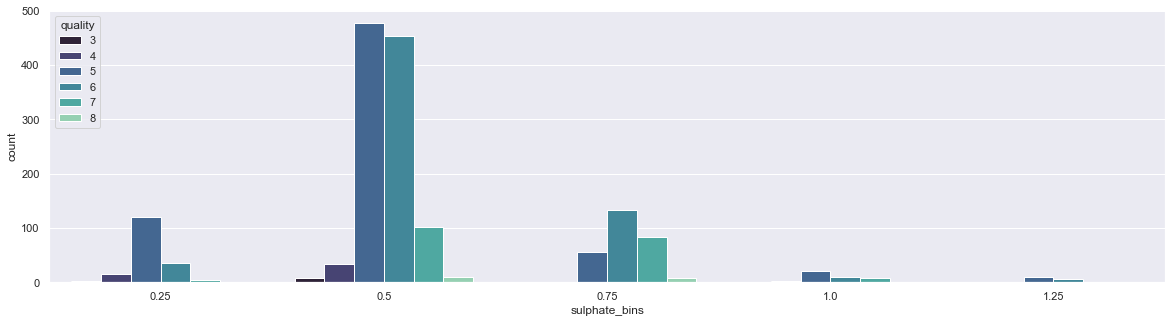

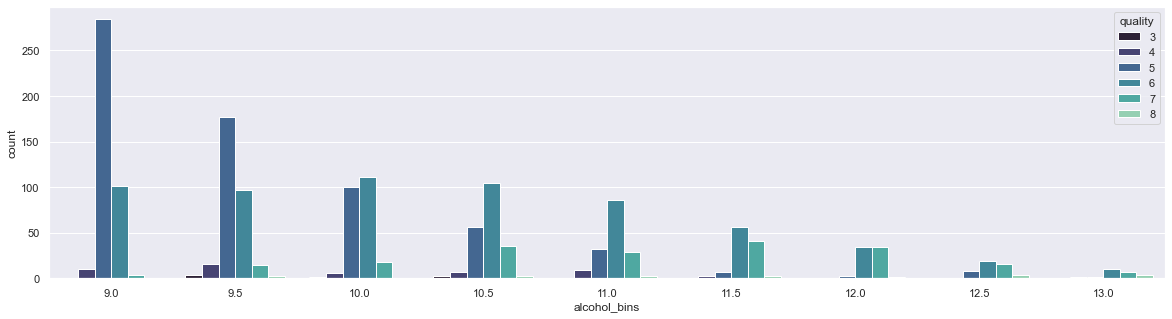

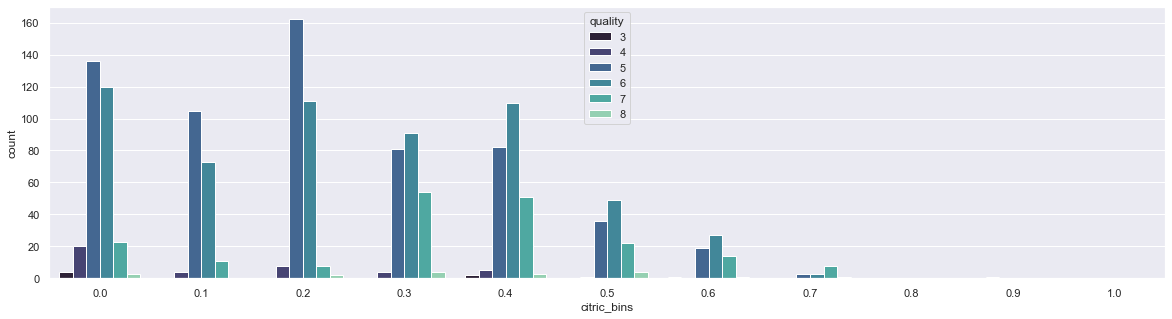

In [12]:
hue = data_bins['quality']

plot_data = data_bins[['volatile_bins','sulphate_bins', 
                       'alcohol_bins', 'citric_bins']]

data_plot(hue, plot_data)

### However, as we are building a classification model we need our quality binned into our good/bad classifiers
* quality bins (good or bad) by:
    * volatile acidity bins
    * sulphate bins
    * alcohol bins
    * citric bins

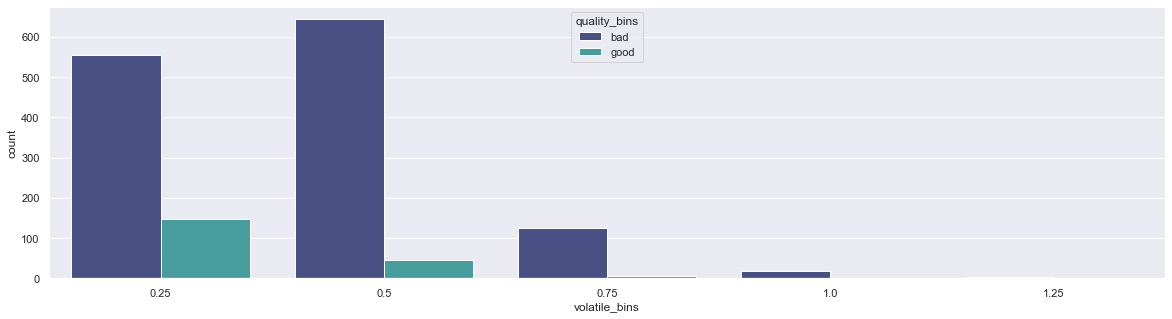

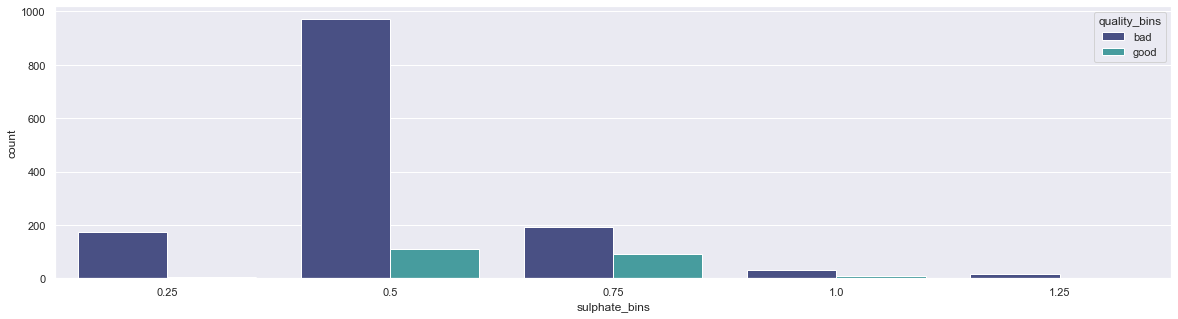

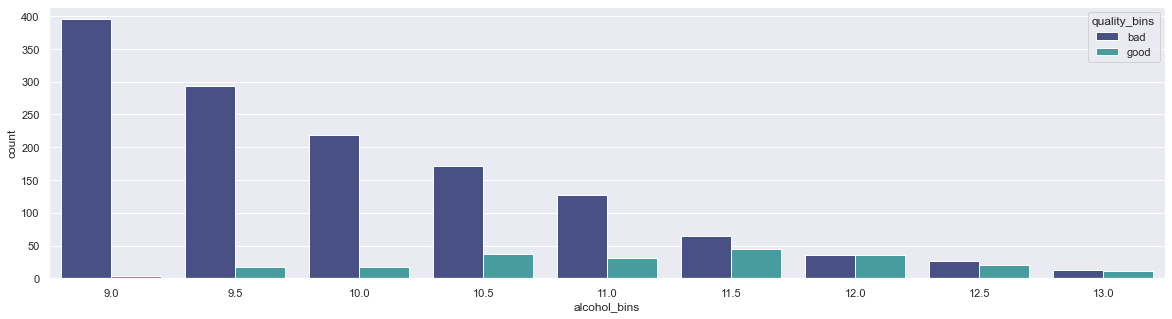

In [13]:
hue = data_bins['quality_bins']
plot_data = data_bins[['volatile_bins','sulphate_bins', 'alcohol_bins']]

data_plot(hue, plot_data)



## Modeling

In [14]:
#Create another copy and reintroduce the binary classifier for quality features
wine = data.copy()
bins = (2, 6, 8)
rating = ['bad', 'good']

wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = rating)

In [15]:
from sklearn.preprocessing import LabelEncoder

wine_labeler = LabelEncoder()

wine['quality'] = wine_labeler.fit_transform(wine['quality'])

wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [16]:
# Create our training and testing sets

from sklearn.model_selection import train_test_split

X = wine.drop('quality', axis=1)
y = wine['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   random_state = 42)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train shape:  (1119, 11)
y_train shape:  (1119,)
X_test shape:  (480, 11)
y_test shape:  (480,)


In [17]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#### Gradient Descent Classifier

Results of SGDClassifier(penalty=None) Model: 

Accuracy of model 0.8542

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       413
           1       0.38      0.07      0.12        67

    accuracy                           0.85       480
   macro avg       0.63      0.53      0.52       480
weighted avg       0.80      0.85      0.81       480


Confusion Matrix:
[[405   8]
 [ 62   5]]



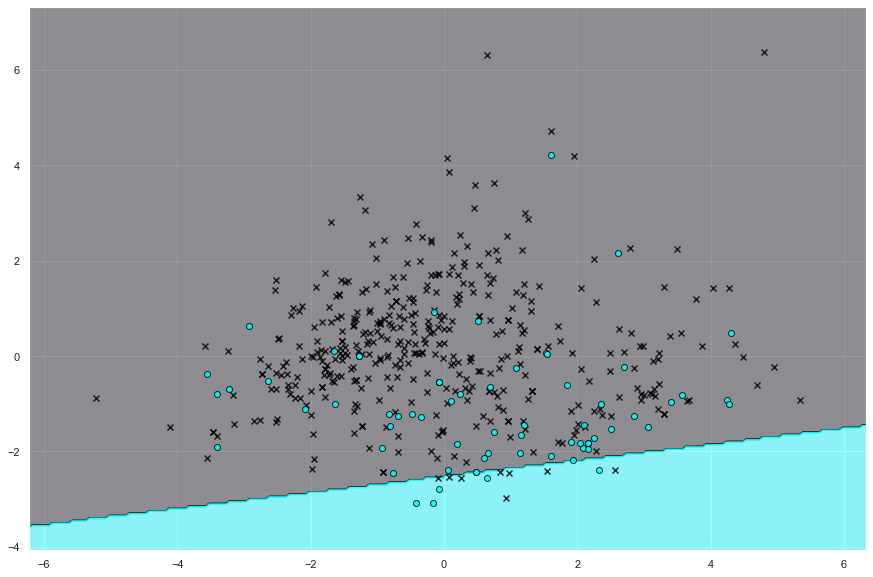

In [18]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

project_utils.print_results(sgd, X_test, y_test)

project_utils.visual_model('Gradient Descent', X_test, y_test, sgd)

#### Random Forest

Results of RandomForestClassifier(n_estimators=200) Model: 

Accuracy of model 0.8688

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       413
           1       0.54      0.37      0.44        67

    accuracy                           0.87       480
   macro avg       0.72      0.66      0.68       480
weighted avg       0.85      0.87      0.86       480


Confusion Matrix:
[[392  21]
 [ 42  25]]



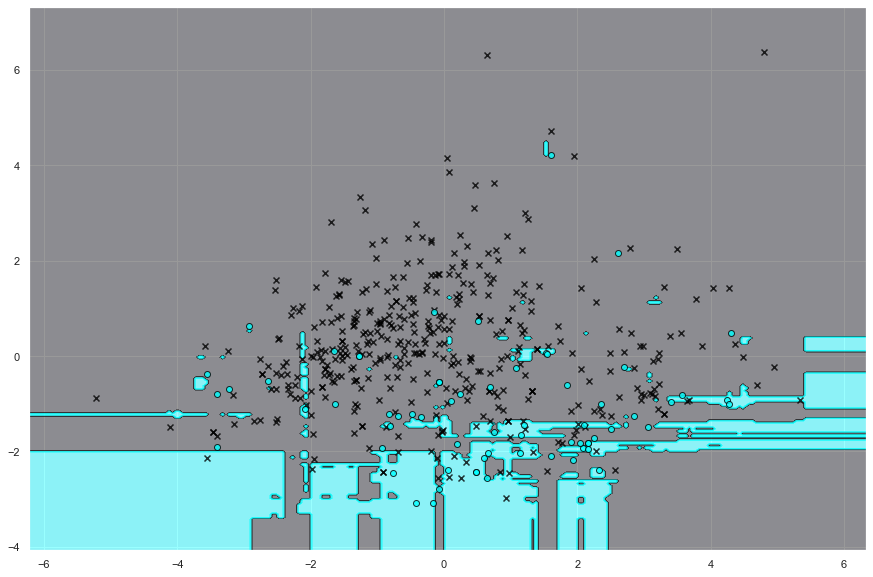

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)

rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

project_utils.print_results(rfc, X_test, y_test)

project_utils.visual_model('Random Forest', X_test, y_test, rfc)

### Logistic Regression

Results of LogisticRegression() Model: 

Accuracy of model 0.8583

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       413
           1       0.47      0.10      0.17        67

    accuracy                           0.86       480
   macro avg       0.67      0.54      0.55       480
weighted avg       0.81      0.86      0.82       480


Confusion Matrix:
[[405   8]
 [ 60   7]]



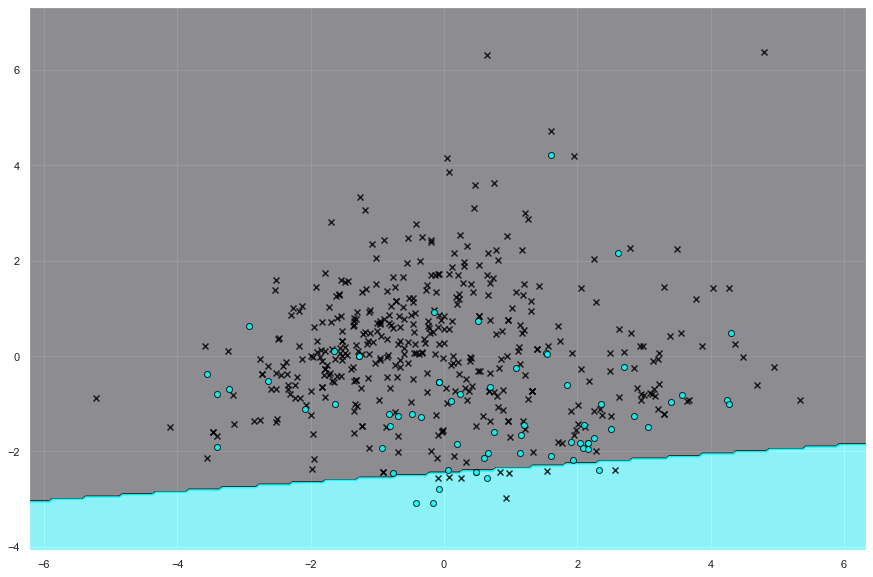

In [27]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

project_utils.print_results(logreg, X_test, y_test)

project_utils.visual_model('Logistic Regression', X_test, y_test, logreg)

### Decision Tree Modeling

Results of DecisionTreeClassifier(criterion='entropy', random_state=42) Model: 

Accuracy of model 0.8229

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       413
           1       0.39      0.46      0.42        67

    accuracy                           0.82       480
   macro avg       0.65      0.67      0.66       480
weighted avg       0.84      0.82      0.83       480


Confusion Matrix:
[[364  49]
 [ 36  31]]



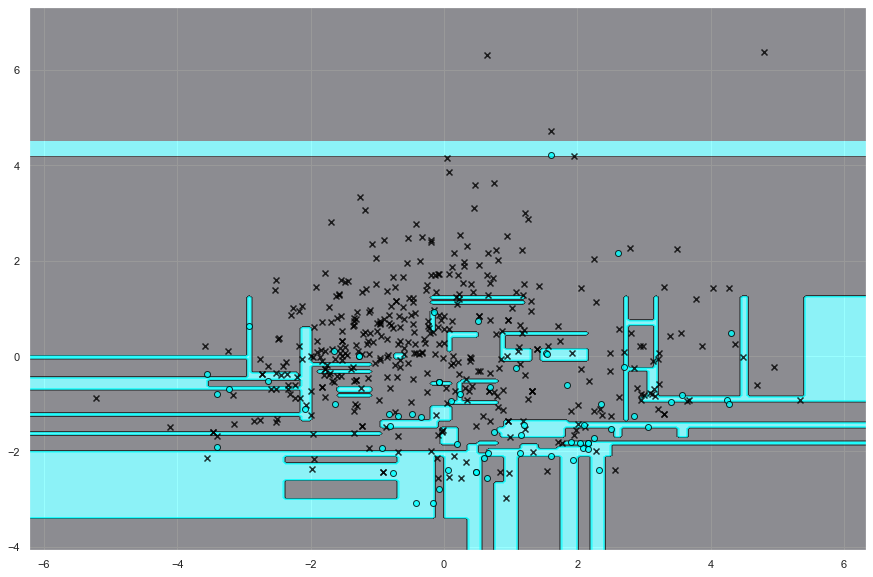

In [25]:
from sklearn.tree import DecisionTreeClassifier as DT

dt_model = DT(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)

project_utils.print_results(dt_model, X_test, y_test)

project_utils.visual_model('Decision Tree Modeling', X_test, y_test, dt_model)

### Can we fine tune?

In [29]:
from sklearn.model_selection import GridSearchCV

para_grim = [
    {'n_estimators' : [2, 10, 20],'max_features':[2, 4, 6]},
    {'bootstrap': [False], 'n_estimators':[2, 10], 'max_features':[2,3,4]}]

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, para_grim, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(X, y)

grid_search.best_params_

{'max_features': 4, 'n_estimators': 20}

In [30]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

0.34829550248788965 {'max_features': 2, 'n_estimators': 2}
0.3002684927054431 {'max_features': 2, 'n_estimators': 10}
0.2981922167969969 {'max_features': 2, 'n_estimators': 20}
0.36236688183840915 {'max_features': 4, 'n_estimators': 2}
0.3051020886240516 {'max_features': 4, 'n_estimators': 10}
0.29686971410902196 {'max_features': 4, 'n_estimators': 20}
0.36216339360530575 {'max_features': 6, 'n_estimators': 2}
0.3087697425566425 {'max_features': 6, 'n_estimators': 10}
0.3011433769219404 {'max_features': 6, 'n_estimators': 20}
0.3586843830962201 {'bootstrap': False, 'max_features': 2, 'n_estimators': 2}
0.3022534877323915 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.3617398255800131 {'bootstrap': False, 'max_features': 3, 'n_estimators': 2}
0.30024310943781923 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.33989628811906136 {'bootstrap': False, 'max_features': 4, 'n_estimators': 2}
0.30031569726718976 {'bootstrap': False, 'max_features': 4, 'n_estimators'